<a href="https://colab.research.google.com/github/sherlocktomz/Generative-AI-Transformer/blob/main/Week3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with Tensorflow
In this assignment, you will be familiarized with the usage of the tensorflow library and how to build a model for the MNIST database in two ways
*   using the inbuilt layers in tensorflow
*   using custom layers to replicate the same result



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## Loading and preprocessing the Data
We will directly be using the dataset included in tensorflow library
A detailed description of data is given at (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Heres how the data looks

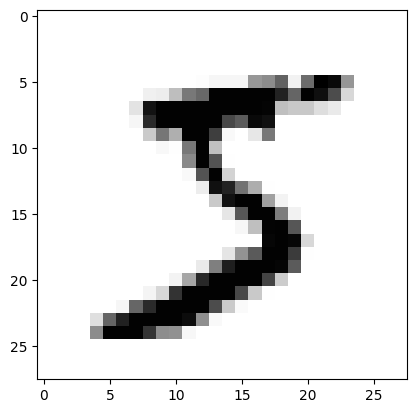

In [3]:
plt.imshow(x_train[0],cmap= 'Greys')

In [4]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

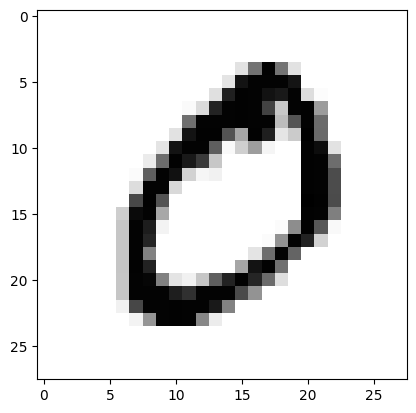

In [5]:
plt.imshow(x_train[1],cmap= 'Greys')

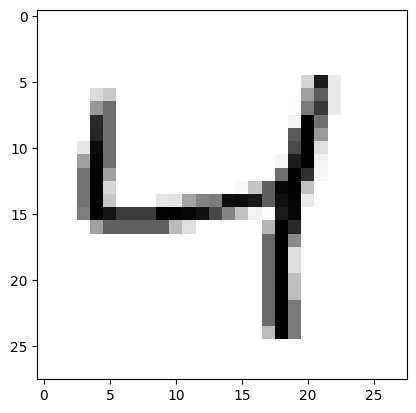

In [6]:
plt.imshow(x_train[2],cmap= 'Greys')

In [7]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}', test_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8678 - loss: 0.4688 - val_accuracy: 0.9547 - val_loss: 0.1539
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9620 - loss: 0.1320 - val_accuracy: 0.9677 - val_loss: 0.1118
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9753 - loss: 0.0845 - val_accuracy: 0.9689 - val_loss: 0.1039
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9819 - loss: 0.0638 - val_accuracy: 0.9731 - val_loss: 0.0887
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9864 - loss: 0.0485 - val_accuracy: 0.9726 - val_loss: 0.0925
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.0965
Test accuracy: 0.9743000268936157 0.08058114349842072


# Making a simple feedforward network
As you have seen in the second week a simple feedfordward network works well to solve MNIST.<br/>
The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

## Making Custom Layers
You can go through this
<a href = 'https://www.tensorflow.org/tutorials/customization/custom_layers'> documentation </a> to get a feel for how to implement a custom layer

* Create a CustomDenseLayer with a Relu Activation
* Create a CustomDenseLayer with a Softmax Activation
* Create a CustomFlatten Layer

Altough we have provided solutions in the Next Cell Try to figure this out on your own.


In [8]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units
        #TODO

    def build(self, input_shape):
        self.w = self.add_weight(name="Weights", shape = (input_shape[-1],self.units),initializer = 'random_normal')
        self.b = self. add_weight(name="b", shape = (self.units,),initializer = 'zeros')
        #TODO

    def call(self, inputs):
        #TODO
        return tf.nn.relu(tf.matmul(inputs,self.w)+self.b)


class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units
        #TODO

    def build(self, input_shape):
        #TODO
        self.w = self.add_weight(name="Weights", shape = (int(input_shape[-1]),self.units),initializer = 'random_normal')
        self.b = self. add_weight(name="b", shape = (self.units,),initializer = 'zeros')

    def call(self, inputs):
        #TODO
        return tf.nn.softmax(tf.matmul(inputs,self.w)+self.b)


class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0],-1))

In [9]:
'''class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.softmax(z)
        return z

class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))
'''


## Using out custom layers to Build a model for MNIST

In [10]:
# Example usage of the custom dense layer
model = Sequential([
    CustomFlattenLayer(),
    CustomDenseReluLayer(128),
    CustomDenseSoftmaxLayer(10)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8542 - loss: 0.5508 - val_accuracy: 0.9515 - val_loss: 0.1692
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9547 - loss: 0.1537 - val_accuracy: 0.9645 - val_loss: 0.1213
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9728 - loss: 0.0964 - val_accuracy: 0.9701 - val_loss: 0.1034
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9799 - loss: 0.0706 - val_accuracy: 0.9693 - val_loss: 0.1002
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9843 - loss: 0.0544 - val_accuracy: 0.9731 - val_loss: 0.0900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1032
Test accuracy: 0.9732000231742859


# Assignment
* Load and preprocess Boston housing dataset
* build a Linear Regression model for it and optimize it using tensorflow (its basically a neural network with a single neuron and no activaton)
* build a Feedforward network for it you can expirement around with no of layers and and neurons in each layer and different activation functions <br/>





# Bonus Assignment
* Try solving one more random dataset from kaggle/tensorflow datasets